# Intro to Machine Learning Homework 2

### Bryce Readyhough 
### ID-801005029

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading in the dataset and displaying the first few rows

In [2]:
dataset = pd.read_csv("diabetes.csv")

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7]]
Y = dataset.iloc[:, 8]
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Splitting the dataset into Training and Evaluation datasets. For this Homework an 80-20 split was used; where 80% of the data was in the training set and 20% was in the evaluation set.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_eval, Y_train, Y_eval = train_test_split(X, Y, test_size = 0.2, random_state = np.random.randint(1), shuffle = 0)

Next, feature scaling was applied to the test and eval datasets. This Scales the datapoints so that they all fall within 0 and 1. This Will be vwery important to allow the algorithm to distinguish between the number of pregnancies which is a realtivaly low number and the glucose value which is a relatively high number.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_eval = scaler.fit_transform(X_eval)

## Problem 1
Using the dataset a logistic regression binary classifier was built

In [7]:
from sklearn.linear_model import LogisticRegression 
Prob1Classifier = LogisticRegression(random_state=0) 
Prob1Classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [8]:
prob1_Y_prediction = Prob1Classifier.predict(X_eval)
prob1_Y_prediction[0:9]

array([1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

Building the confusion matrix to determine the accuracy of the model

In [9]:
from sklearn.metrics import confusion_matrix 
prob1_cnf_matrix = confusion_matrix(Y_eval, prob1_Y_prediction) 
prob1_cnf_matrix 

array([[94, 13],
       [18, 29]], dtype=int64)

In [10]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_eval, prob1_Y_prediction)) 
print("Precision:",metrics.precision_score(Y_eval, prob1_Y_prediction)) 
print("Recall:",metrics.recall_score(Y_eval, prob1_Y_prediction))

Accuracy: 0.7987012987012987
Precision: 0.6904761904761905
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

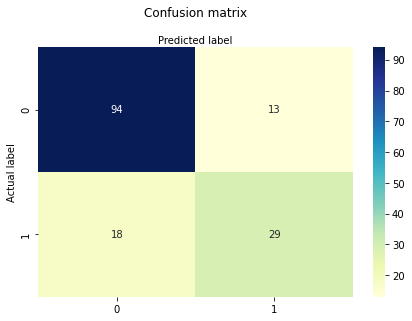

In [11]:
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(prob1_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

## Problem 2
This time a Naive Bays classifier was used. The same dataset was used as in Problem 1 with the same 80-20 split between training and evaluaation

In [12]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 
classifier.fit(X_train, Y_train)

prob2_Y_prediction = classifier.predict(X_eval)

In [13]:
prob2_cnf_matrix = confusion_matrix(Y_eval, prob2_Y_prediction) 
prob2_cnf_matrix 

print("Accuracy:",metrics.accuracy_score(Y_eval, prob2_Y_prediction)) 
print("Precision:",metrics.precision_score(Y_eval, prob2_Y_prediction)) 
print("Recall:",metrics.recall_score(Y_eval, prob2_Y_prediction))

Accuracy: 0.7662337662337663
Precision: 0.6078431372549019
Recall: 0.6595744680851063


Text(0.5, 257.44, 'Predicted label')

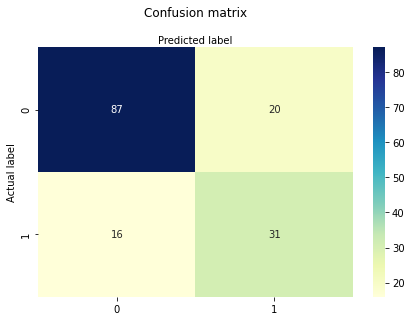

In [14]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(prob2_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

## Problem 3
The logisitic regression from Problem 1 was built once more. This time, however, K-fold cross-validation was implemented. A value of K=5 and K=10 was used.